##### Importing packages

In [1]:
# import libraries
from patchify import patchify, unpatchify
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import img_as_ubyte, exposure, io
import cv2

In [2]:
### load image
full_img = io.imread('images/S1A_IW_GRDH_1SDV_20150419T155633_20150419T155658_005555_0071AF_7CF1_Orb_NR_Cal_EC.tiff')

In [3]:
print(full_img.shape, full_img.dtype, type(full_img))

(21323, 33263) float32 <class 'numpy.ndarray'>


In [3]:
thresh = 0.04
full_img[full_img > thresh] = thresh

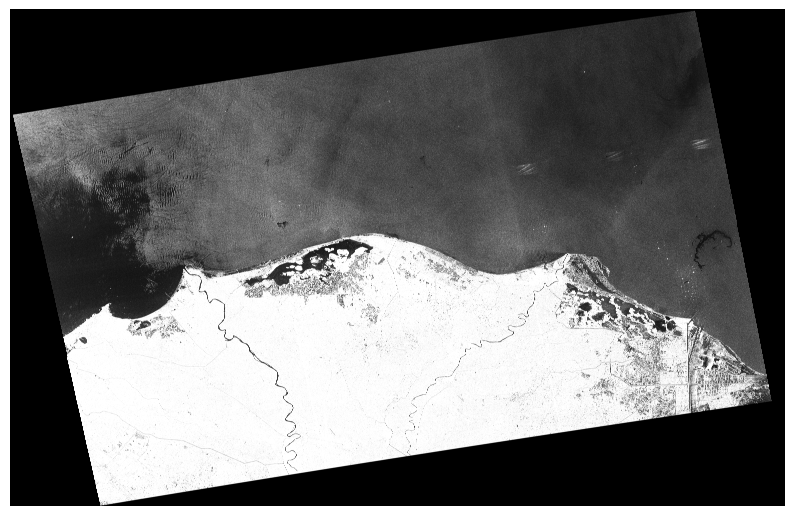

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(full_img, cmap='gray') # display the image
plt.axis('off')
plt.show()

### Creating non-overlapping patches

In [4]:
# Define the desired patch size
patch_size = 4096

# define step size (horizontal, vertical) that must be shifted to create the next pacth
step_size= (patch_size, patch_size)

In [5]:
# creating patches
patches = patchify(full_img, (patch_size, patch_size), step=step_size)
patches.shape

(5, 8, 4096, 4096)

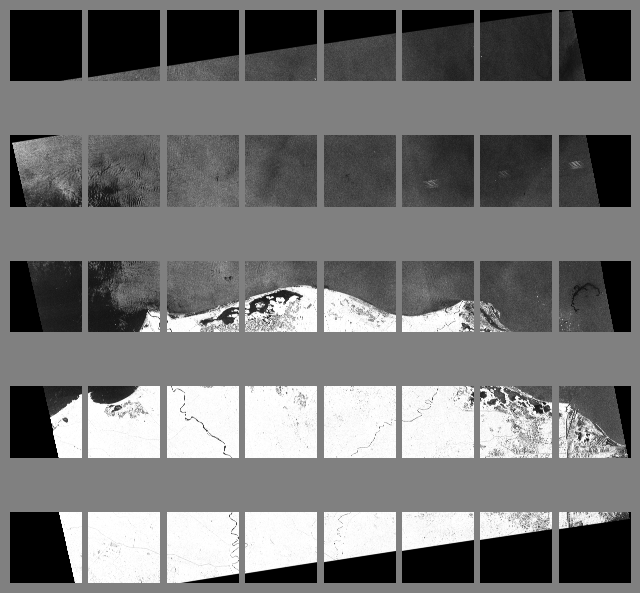

In [17]:
# displaying patches
fig, ax = plt.subplots(patches.shape[0], patches.shape[1], figsize=(8,8), facecolor='gray')
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        ax[i][j].imshow(patches[i][j], cmap='gray')
        ax[i][j].axis('off')     




##### saving patches to folder

In [13]:
# Set the threshold value
thresh = 100

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        single_patch_img = patches[i, j, :, :]
        
        # Apply thresholding to enhance contrast
        single_patch_img[single_patch_img > thresh] = thresh
        
        # Normalize the image
        single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        
        # Save the image
        if not cv2.imwrite('images/patches_no_overlap/' + 'image_' + '_'+ str(i)+str(j)+'.jpg', single_patch_img):
            raise Exception("Could not write the image")


### Creating Patches with overlap

In [14]:
# Define the desired patch size
patch_size = 4096

# define step size (horizontal, vertical) that must be shifted to create the next pacth
step_size_ol= (2048, 2048)

In [15]:
# creating patches
overlap_patches = patchify(full_img, (patch_size, patch_size), step=step_size_ol)
overlap_patches.shape

(9, 15, 4096, 4096)

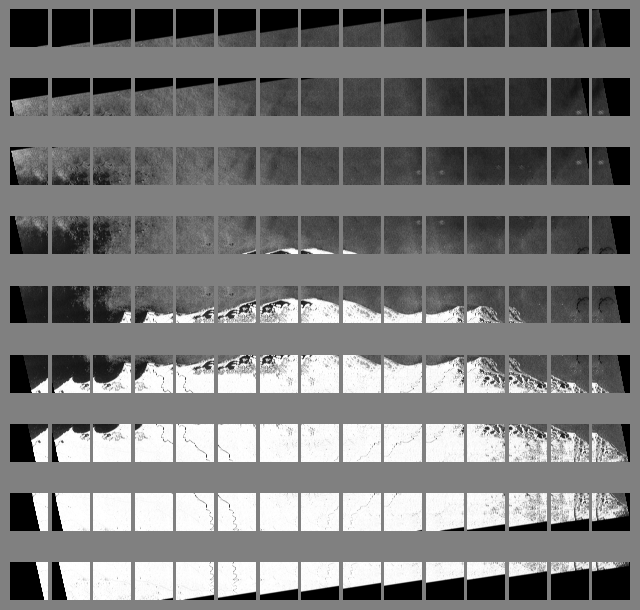

In [16]:
# displaying patches
fig, ax = plt.subplots(overlap_patches.shape[0], overlap_patches.shape[1], figsize=(8,8), facecolor='gray')
for i in range(overlap_patches.shape[0]):
    for j in range(overlap_patches.shape[1]):
        ax[i][j].imshow(overlap_patches[i][j], cmap='gray')
        ax[i][j].axis('off')
#plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)

##### saving patches to folder

In [17]:
# Set the threshold value
thresh = 50

for i in range(overlap_patches.shape[0]):
    for j in range(overlap_patches.shape[1]):
        single_patch_img = overlap_patches[i, j, :, :]
        
        # Apply thresholding to enhance contrast
        single_patch_img[single_patch_img > thresh] = thresh
        
        # Normalize the image
        single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        
        # Save the image
        if not cv2.imwrite('images/patches_overlap/' + 'image_' + '_'+ str(i)+str(j)+'.jpg', single_patch_img):
            raise Exception("Could not write the image")


### creating patches with padding

In [4]:
# Calculate the patch size
patch_size = 4096

# Pad the image with zeros
img_padded = np.pad(full_img, ((0, patch_size - full_img.shape[0] % patch_size),
                           (0, patch_size - full_img.shape[1] % patch_size)), mode='constant')



In [5]:
step_size= (patch_size, patch_size)

# Extract patches using patchify
patches_padded = patchify(img_padded, (patch_size, patch_size), step=step_size)
patches_padded.shape


(6, 9, 4096, 4096)

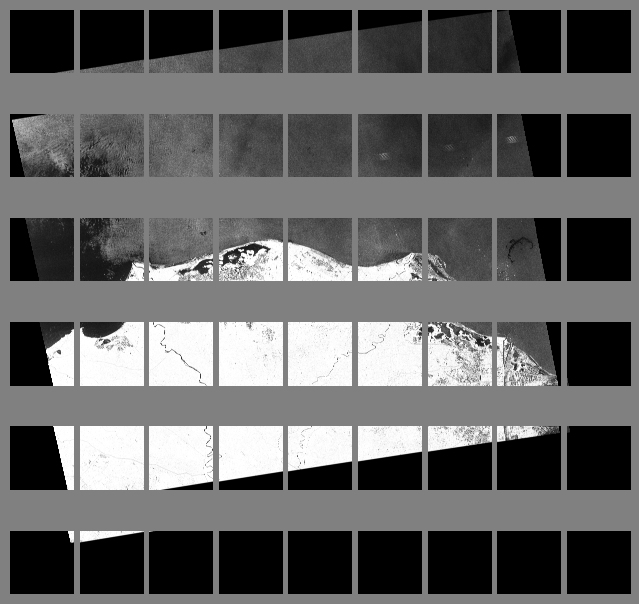

In [6]:
# displaying patches
fig, ax = plt.subplots(patches_padded.shape[0], patches_padded.shape[1], figsize=(8,8), facecolor='gray')
for i in range(patches_padded.shape[0]):
    for j in range(patches_padded.shape[1]):
        ax[i][j].imshow(patches_padded[i][j], cmap='gray')
        ax[i][j].axis('off')
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.axis('off')

##### saving patches to folder

In [7]:
# Set the threshold value
thresh = 50

for i in range(patches_padded.shape[0]):
    for j in range(patches_padded.shape[1]):
        single_patch_img = patches_padded[i, j, :, :]
        
        # Apply thresholding to enhance contrast
        single_patch_img[single_patch_img > thresh] = thresh
        
        # Normalize the image
        single_patch_img = cv2.normalize(single_patch_img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
        
        # Save the image
        if not cv2.imwrite('images/patches_padded/' + 'image_' + '_'+ str(i)+str(j)+'.jpg', single_patch_img):
            raise Exception("Could not write the image")

### computing leftover pixels/patches

In [ ]:
#### covers the entire width and height

In [ ]:
# find image dimensions
w, h = img.size
print(w, h)

In [ ]:
# Getting image dimensions width and height
h, w = img_arr.shape[0], img_arr.shape[1]

In [ ]:
# convert image to numpy array
img_arr = np.array(img)

In [ ]:
n_patches_ver = np.floor(h / patch_size) + 1
n_patches_hor = np.floor(w / patch_size) + 1
tot_patches = n_patches_hor * n_patches_ver

In [ ]:
# Compute the step size needed to cover the entire image
if "step_size_hor" and "step_size_ver" not in locals():
    step_size_hor = np.floor((w - patch_size) / (n_patches_hor - 1))
    step_size_ver = np.floor((h - patch_size) / (n_patches_ver - 1))

In [ ]:
# Compute the amount of unused image with overlap
#leftover_hor = w - ((n_patches_hor - 1) * step_size_hor + patch_size)
#leftover_ver = h - ((n_patches_ver - 1) * step_size_ver + patch_size)

leftover_hor = (w - n_patches_hor) % step_size_hor
leftover_ver = (w - n_patches_ver) % step_size_ver

In [ ]:
print("Number of patches: ({}, {})".format(n_patches_ver, n_patches_hor))
print("Step size: ({}, {})".format(step_size_ver, step_size_hor))
print("Unused image: ({}, {})".format(leftover_ver, leftover_hor))

#### covers the based on the patch and step_sizes chosen

In [ ]:
# Compute the number of patches that fit horizontally and vertically without ovelapping
n_patches_ver = np.floor(h / patch_size)
n_patches_hor = np.floor(w / patch_size)
tot_patches = n_patches_hor * n_patches_ver

In [ ]:
# Compute the step size needed to cover the entire image
if "step_size" not in locals():
    step_size_hor = np.floor((w - patch_size) / (n_patches_hor - 1))
    step_size_ver = np.floor((h - patch_size) / (n_patches_ver - 1))

In [ ]:
# Compute the amount of unused image without overlap
leftover_hor = w - (n_patches_hor * patch_size)
leftover_ver = h - (n_patches_ver * patch_size)

In [ ]:
print("Number of patches: ({}, {})".format(n_patches_ver, n_patches_hor))
print("Step size: ({}, {})".format(step_size_ver, step_size_hor))
print("Unused image: ({}, {})".format(leftover_ver, leftover_hor))

### Image data augmentation

In [ ]:
import Augmentor
p = Augmentor.Pipeline('images/patches_no_overlap')
p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)
p.flip_left_right(probability=0.5)
p.zoom_random(probability=0.5, percentage_area=0.8)
p.flip_top_bottom(probability=0.5)
p.sample(100)